In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('CarPricesPrediction.csv')

In [3]:
df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [4]:
df.isnull().sum()

Unnamed: 0    0
Make          0
Model         0
Year          0
Mileage       0
Condition     0
Price         0
dtype: int64

# Thus we can see that the dataset does not have any null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [6]:
df=df.drop(['Unnamed: 0'],axis=1)

In [7]:
df['Make'].unique()

array(['Ford', 'Toyota', 'Chevrolet', 'Nissan', 'Honda'], dtype=object)

In [8]:
df['Make']=df['Make'].map({'Ford':1, 'Toyota':2, 'Chevrolet':3, 'Nissan':4, 'Honda':5})

In [9]:
df['Model'].unique()

array(['Silverado', 'Civic', 'Altima', 'Camry', 'F-150'], dtype=object)

In [10]:
df['Model']=df['Model'].map({'Silverado':1, 'Civic':2, 'Altima':3, 'Camry':4, 'F-150':5})

In [11]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair'], dtype=object)

In [12]:
df['Condition']=df['Condition'].map({'Excellent':1, 'Good':2, 'Fair':3})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   int64  
 1   Model      1000 non-null   int64  
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   int64  
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [14]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)

In [17]:
models={
                "Random Forest":RandomForestRegressor(n_estimators=50),
                "Decision Tree":DecisionTreeRegressor(),
                "Gradient Boosting":GradientBoostingRegressor(),
                "Linear Regression":LinearRegression(),
                "K-Neighbours Regressor":KNeighborsRegressor(),
                "XGBClassifier":XGBRegressor(),
                "CatBoosting Regressor":CatBoostRegressor(verbose=False),
                "AdaBoost Regressor":AdaBoostRegressor(),
            }

In [18]:
results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {"model": model, "r2": r2, "predictions": y_pred}

# Print results
for model_name, result in results.items():
    print(f"{model_name}: R-squared = {result['r2']}")

Random Forest: R-squared = 0.998804647663321
Decision Tree: R-squared = 0.9972438113537323
Gradient Boosting: R-squared = 0.9989677420120661
Linear Regression: R-squared = 0.9999999997673243
K-Neighbours Regressor: R-squared = 0.08834023427730475
XGBClassifier: R-squared = 0.9988900650230716
CatBoosting Regressor: R-squared = 0.9996406920430585
AdaBoost Regressor: R-squared = 0.9767090955520983


# Thus we can say that Random Forest Algorithm is working the best

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
rm=RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

C:\Users\ayan0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [20]:
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50)

In [21]:
clf = RandomForestRegressor(n_estimators=50).fit(x_train,y_train)
print("Training:"+str(clf.score(x_train,y_train)))
print("Test:"+str(clf.score(x_test,y_test)))
pred = clf.predict(x_train)

Training:0.9998251148123694
Test:0.998811223240455


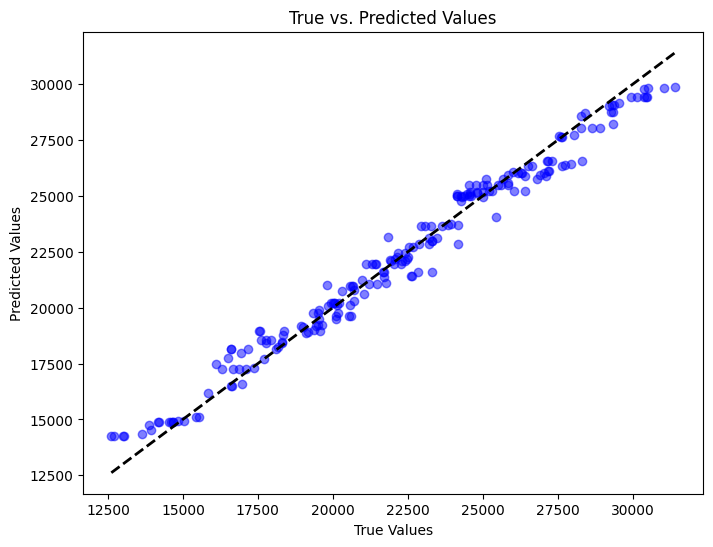

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

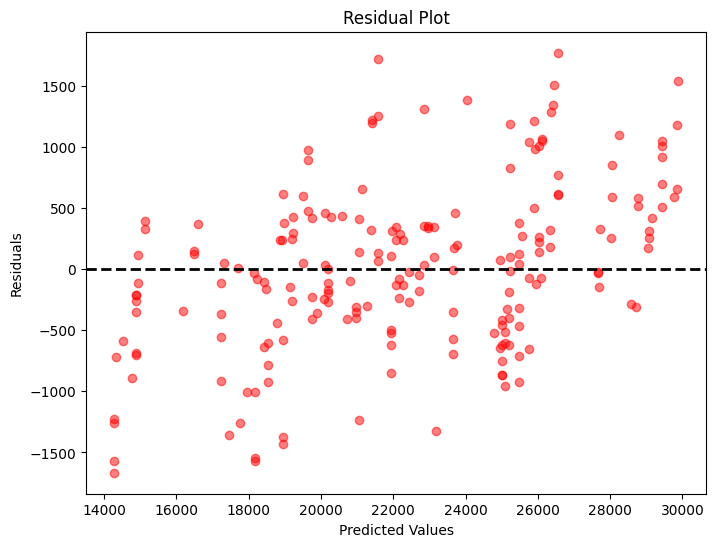

In [26]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='red', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--', lw=2)  # Horizontal line at y=0
plt.show()
